In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("E:\\GL\\Week 3\\Data\\StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Look the mean and the median values both are very close so we can say that we dont have outliers

In [3]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


We dont have the missing values 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.shape

(1000, 8)

In [6]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

Female and male ratio is quite close.

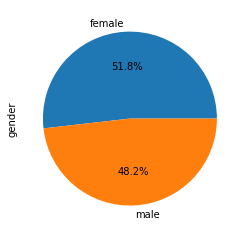

In [7]:
data['gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

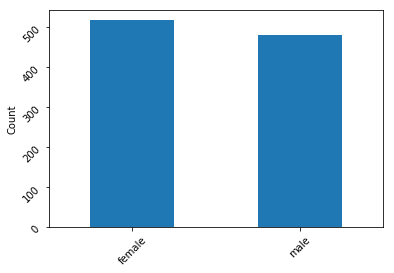

In [8]:
data['gender'].value_counts().plot.bar()
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

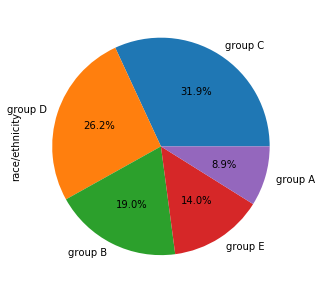

In [9]:
plt.figure(figsize=(10,5))
data['race/ethnicity'].value_counts().plot.pie(autopct='%1.1f%%')

Text(0.5, 1.0, 'Parental level education proportion')

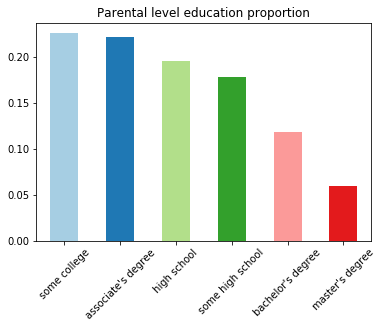

In [116]:
data['parental level of education'].value_counts(normalize=1).plot.bar(color=plt.cm.Paired(np.arange(len(data['parental level of education'].value_counts()))))
plt.xticks(rotation=45)
plt.title('Parental level education proportion')

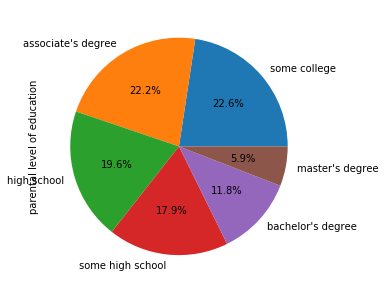

In [10]:
plt.figure(figsize=(10,5))
data['parental level of education'].value_counts().plot.pie(autopct='%1.1f%%')

In [11]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [12]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Group c values are higher when compared with the others.

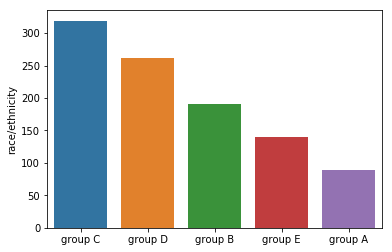

In [13]:
sns.barplot(data=data,x=data['race/ethnicity'].value_counts().index,y=data['race/ethnicity'].value_counts())

Female has more mean reading score as well as writing score.


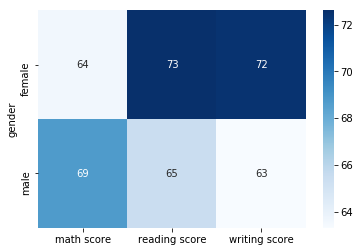

In [14]:
data_gender_group=data.groupby('gender').agg({'math score':'mean','reading score':'mean','writing score':'mean'})
sns.heatmap(data_gender_group,cmap='Blues',annot=True)

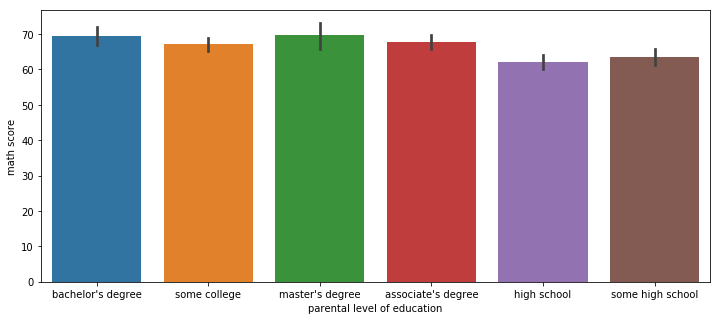

In [15]:
plt.figure(figsize=(12,5))
sns.barplot(data=data,x='parental level of education',y='math score')

In reading score females performance is good in all the levels of the education

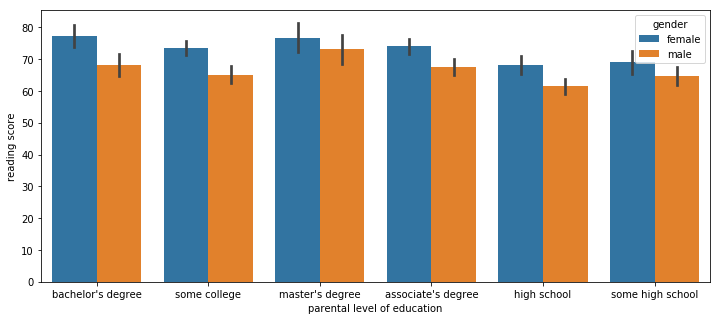

In [16]:
plt.figure(figsize=(12,5))
sns.barplot(data=data,x='parental level of education',y='reading score',hue='gender')

Females performance is better than the male in writing score

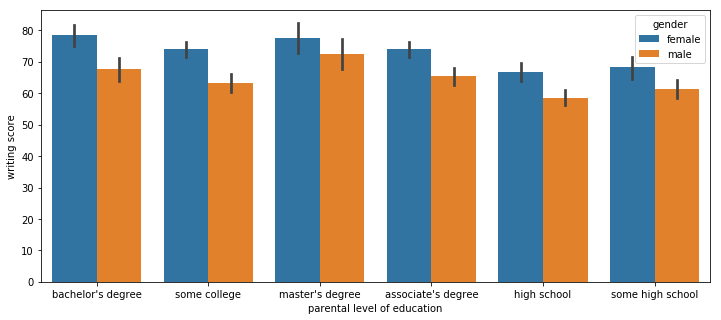

In [17]:
plt.figure(figsize=(12,5))
sns.barplot(data=data,x='parental level of education',y='writing score',hue='gender')

Males performance is better than female in math score but in some education level they are very close to the male scores.

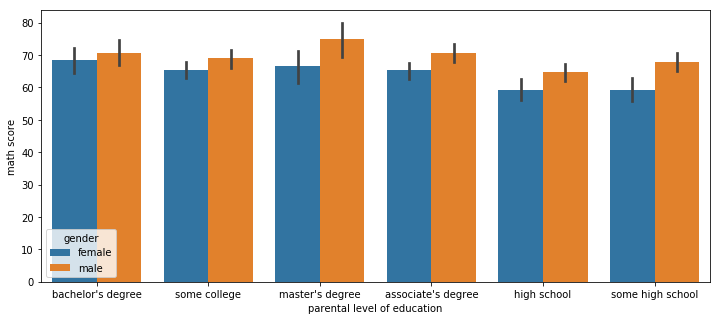

In [18]:
plt.figure(figsize=(12,5))
sns.barplot(data=data,x='parental level of education',y='math score',hue='gender')

In [19]:
data.groupby('gender')['math score','reading score','writing score'].agg(['mean'])


,math score,reading score,writing score
,mean,mean,mean
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


grouping by gender and taking the mean value of the match score,reading score and writing.
It seems that in reading and writing the females are better when compared to the male.

And in math score male are better than females.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

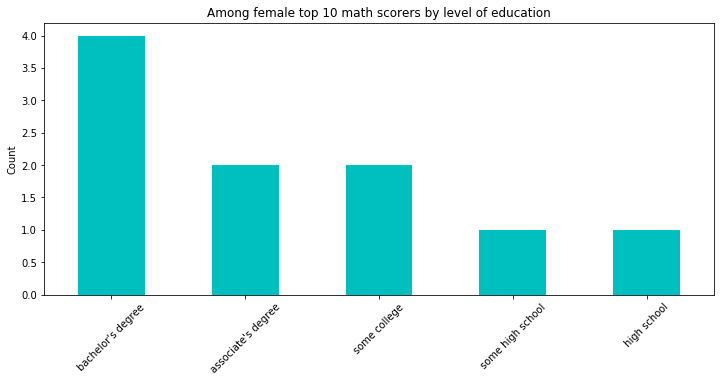

In [20]:
top_10_female_math_scorers=data[data['gender']=='female'][['math score','parental level of education']].sort_values(by='math score',ascending=False).head(10)
top_10_female_math_scorers['parental level of education'].value_counts().plot.bar(color='c',figsize=(12,5))
plt.title('Among female top 10 math scorers by level of education')
plt.ylabel('Count')
plt.xticks(rotation=45)

Among the female the top 10 scores in math score are holding the bachelors degree

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

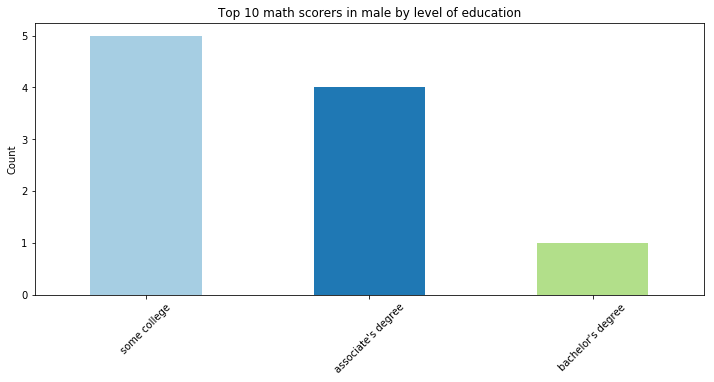

In [21]:
top_10_male_math_scorers=data[data['gender']=='male'][['math score','parental level of education']].sort_values(by='math score',ascending=False).head(10)
top_10_male_math_scorers['parental level of education'].value_counts().plot.bar(color=plt.cm.Paired(np.arange(len(top_10_male_math_scorers))),figsize=(12,5))
plt.title("Top 10 math scorers in male by level of education")
plt.ylabel('Count')
plt.xticks(rotation=45)

Among the male the top 10 math scorers are from some college followed by associate degree.
But there are no males form the high school.

four males has scored 100 out of 100 in math score

In [22]:
data_100_male_math=data[(data['gender']=='male') & (data['math score']==100)]
data_100_male_math

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100


Three females has scored 100 out of 100 in math score.

In [23]:
data_100_female_math=data[(data['gender']=='female') & (data['math score']==100)]
data_100_female_math

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


Only 3 males has scored 100 out of 100 in the reading score

In [24]:
data_100_male_reading=data[(data['gender']=='male') & (data['reading score']==100)]
data_100_male_reading

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
381,male,group C,associate's degree,standard,completed,87,100,95
916,male,group E,bachelor's degree,standard,completed,100,100,100


14 females has scored 100 out of 100 in the reading score almost 4 times more than the male

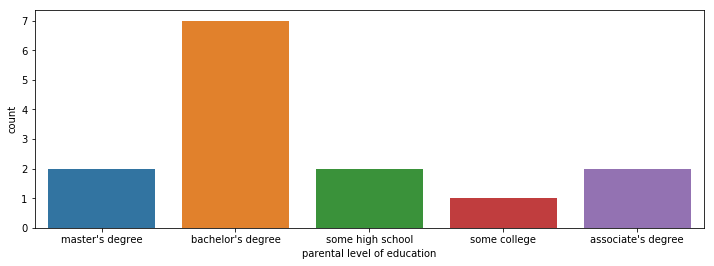

In [25]:
data_100_female_reading=data[(data['gender']=='female') & (data['reading score']==100)]
plt.figure(figsize=(12,4))
sns.countplot(data_100_female_reading['parental level of education'])

14 females has scored 100 out of 100 in the reading score almost 4 times more than the male.
The females who are holding the bachelors degree has scored more number of 100's in the reading score

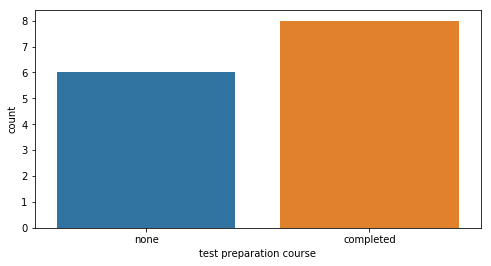

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(data_100_female_reading['test preparation course'])

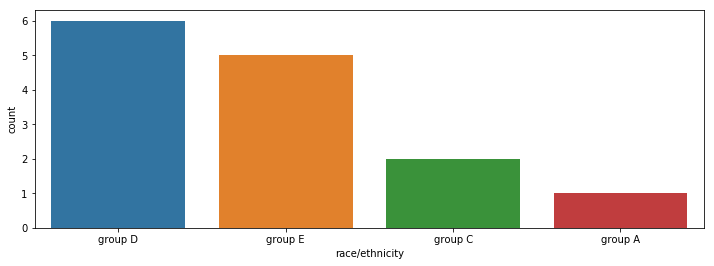

In [27]:
plt.figure(figsize=(12,4))
sns.countplot(data_100_female_reading['race/ethnicity'])

In females the group D and group E has scored 100 in the reading score

In [28]:
data_100_male_writing=data[(data['gender']=='male') & (data['writing score']==100)]
data_100_male_writing

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
916,male,group E,bachelor's degree,standard,completed,100,100,100


Only one male scored 100 out of 100 in writing score

Thirteen females has scored 100 out 100 in writing score

In [29]:
data_100_female_writing=data[(data['gender']=='female') & (data['writing score']==100)]
data_100_female_writing

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
377,female,group D,master's degree,free/reduced,completed,85,95,100
403,female,group D,high school,standard,completed,88,99,100
458,female,group E,bachelor's degree,standard,none,100,100,100
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
685,female,group E,master's degree,standard,completed,94,99,100
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100


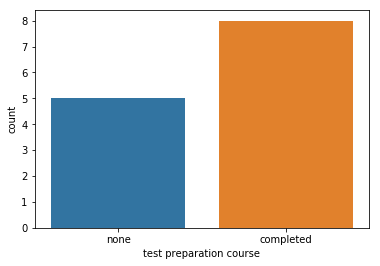

In [30]:
sns.countplot(data_100_female_writing['test preparation course'])

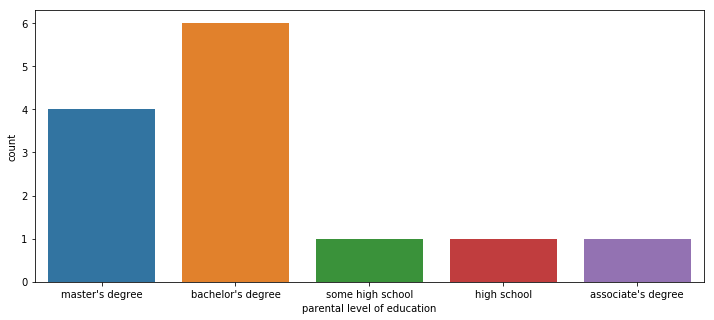

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(data_100_female_writing['parental level of education'])

The females who are holding the bachelors degree as well as masters degree they have score 100 out of 100
in the writing test.

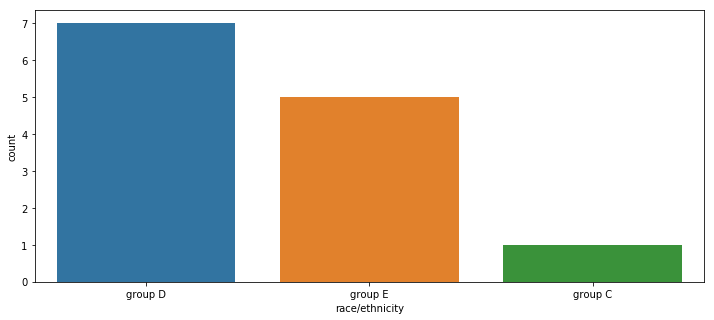

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(data_100_female_writing['race/ethnicity'])

In the females the group D and group E has scored 100 in the writing test

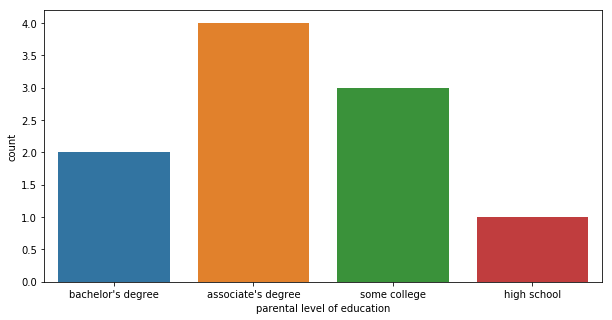

In [33]:
top_10_male_reading_score=data[data['gender']=='male'][['reading score','parental level of education']].sort_values(by='reading score',ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.countplot(top_10_male_reading_score['parental level of education'])

In reading score among the top 10 males the associate degree holders performance is good.

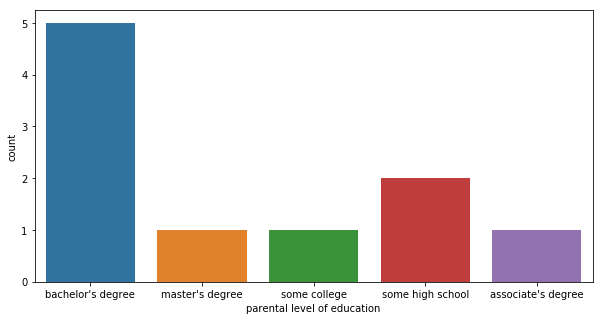

In [34]:
top_10_female_reading_score=data[data['gender']=='female'][['reading score','parental level of education']].sort_values(by='reading score',ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.countplot(top_10_female_reading_score['parental level of education'])

In top 10 scorers of the reading among the females, the bachelors degree holders performance is good

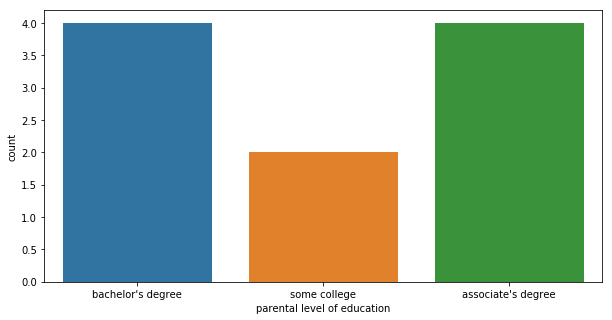

In [35]:
top_10_male_writing_score=data[data['gender']=='male'][['writing score','parental level of education']].sort_values(by='writing score',ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.countplot(top_10_male_writing_score['parental level of education'])

The performance of bachelors degree and asscoiate degree holders is good in top 10 males in writing scores

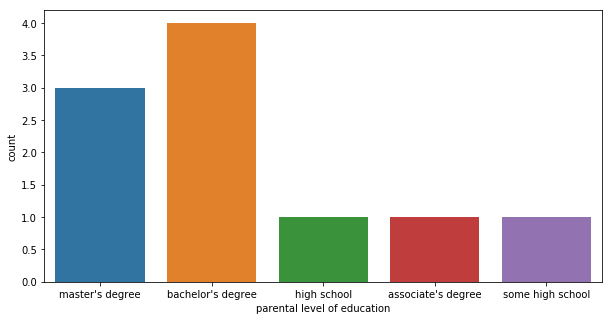

In [36]:
top_10_female_writing_score=data[data['gender']=='female'][['writing score','parental level of education']].sort_values(by='writing score',ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.countplot(top_10_female_writing_score['parental level of education'])

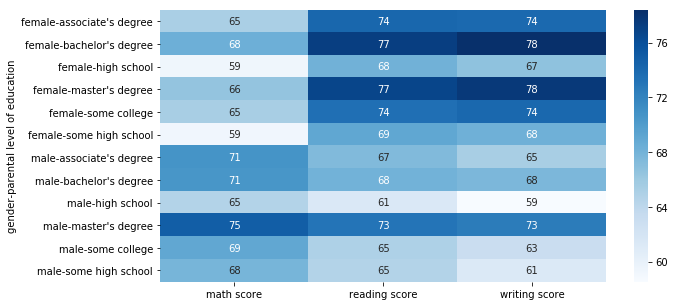

In [37]:
heat=data.groupby(['gender','parental level of education']).agg({'math score':'mean','reading score':'mean','writing score':'mean'})
plt.figure(figsize=(10,5))
sns.heatmap(heat,cmap='Blues',annot=True)

##### 1.The males who hold the masters degree has the overall mean >72 in all the three subjects.
##### 2. Females who hold the bachelor's and masters degree there avg scores are >75 in reading and writing.
##### 3. Basically females with masters,bachelor's,associate and some college degree holders are good at reading and writing scores.
##### 4. Males who are holding the masters degree are good at math score.


In [38]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


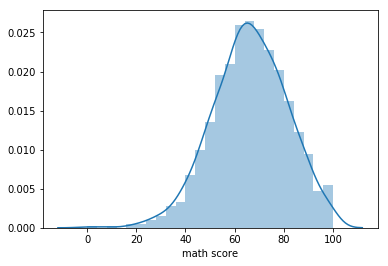

In [39]:
sns.distplot(data['math score'])

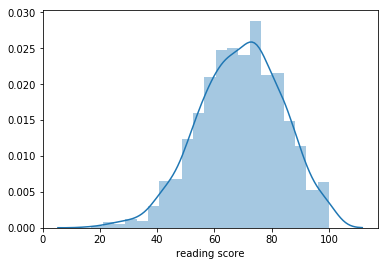

In [40]:
sns.distplot(data['reading score'])

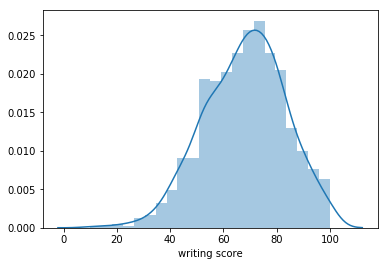

In [41]:
sns.distplot(data['writing score'])

In [42]:
print('mathscore skewness :',data['math score'].skew())
print('reading score skewness :',data['reading score'].skew())
print('writing score skewness ',data['writing score'].skew())

mathscore skewness : -0.27893514909431694
reading score skewness : -0.25910451810923063
writing score skewness  -0.28944397150761897


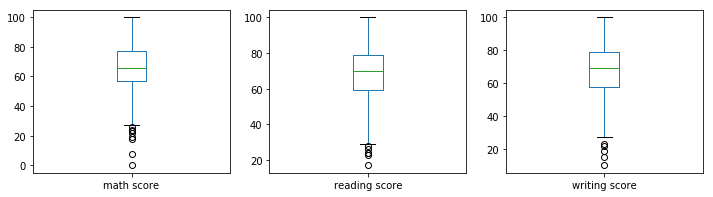

In [43]:
fig,ax = plt.subplots(1,3,figsize=(12,3))
data['math score'].plot.box(ax=ax[0])
data['reading score'].plot.box(ax=ax[1])
data['writing score'].plot.box(ax=ax[2])

In [44]:
data[['math score','reading score','writing score']].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [45]:
#according to the US grading system because the this is the US data
def marks_cat(marks):
    if marks<60:
        return 'F Grade'
    elif 60<=marks<=69:
        return 'D Grade'
    elif 70<=marks<=79:
        return 'C Grade'
    elif 80<=marks<=89:
        return 'B Grade'
    else:
        return 'A Grade'
    
data['math_result']  = data['math score'].apply(marks_cat)  
data['reading_result']  = data['reading score'].apply(marks_cat) 
data['writing_result']  = data['writing score'].apply(marks_cat) 

In [46]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_result,reading_result,writing_result
0,female,group B,bachelor's degree,standard,none,72,72,74,C Grade,C Grade,C Grade
1,female,group C,some college,standard,completed,69,90,88,D Grade,A Grade,B Grade
2,female,group B,master's degree,standard,none,90,95,93,A Grade,A Grade,A Grade
3,male,group A,associate's degree,free/reduced,none,47,57,44,F Grade,F Grade,F Grade
4,male,group C,some college,standard,none,76,78,75,C Grade,C Grade,C Grade


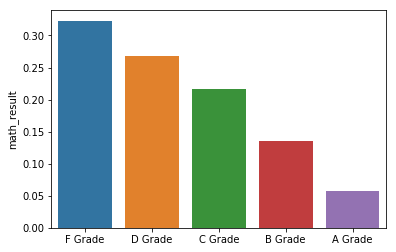

In [47]:
# data['math_result'].value_counts(normalize=1).plot.bar(grid=True)
# plt.xticks(rotation=45)
sns.barplot(x=data['math_result'].value_counts().index,y=data['math_result'].value_counts(normalize=1))

The percentage of the F grade is more in the math result aroung 32%

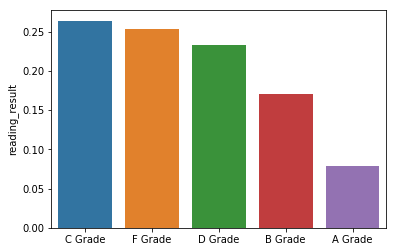

In [48]:
sns.barplot(x=data['reading_result'].value_counts().index,y=data['reading_result'].value_counts(normalize=1))

The percentage of the F grade and the C grade ar almost same

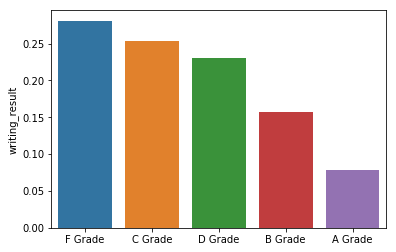

In [49]:
sns.barplot(x=data['writing_result'].value_counts().index,y=data['writing_result'].value_counts(normalize=1))

(array([0, 1]), <a list of 2 Text xticklabel objects>)

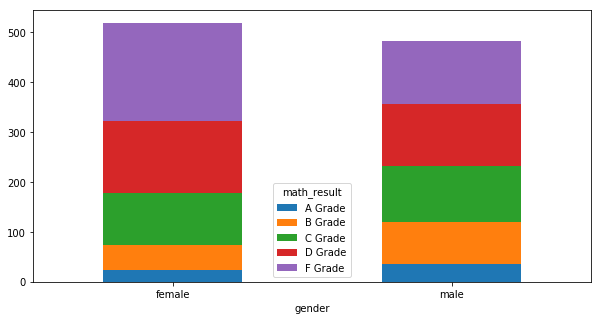

In [50]:
pd.crosstab(data['gender'],data['math_result']).plot.bar(stacked=True,figsize=(10,5))
plt.xticks(rotation=360)


### considering the Math score
#### 1.As we can see in the above chart that the F grade students are more in the female category.
#### 2. B grade students are more in male as compared to female

(array([0, 1]), <a list of 2 Text xticklabel objects>)

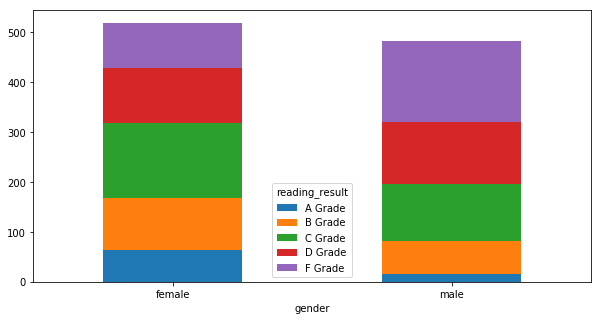

In [51]:
pd.crosstab(data['gender'],data['reading_result']).plot.bar(stacked=True,figsize=(10,5))
plt.xticks(rotation=360)

#### Considering the resulting score
1.The F grade students are more in the male category
2.A grade students are high in the female category
3.Even the B grade students are more in female category.


(array([0, 1]), <a list of 2 Text xticklabel objects>)

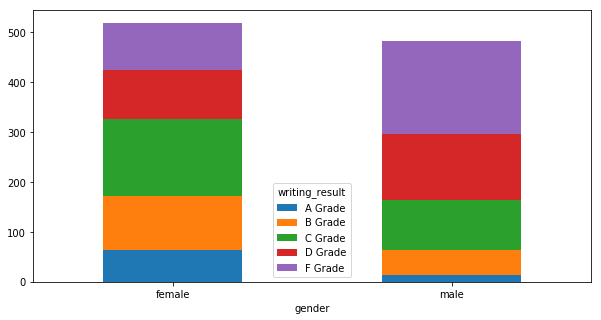

In [52]:
pd.crosstab(data['gender'],data['writing_result']).plot.bar(stacked=True,figsize=(10,5))
plt.xticks(rotation=360)

#### Considering the Writing score
1.The F grade students are more in the male category
2.A grade students are high in the female category
3.Even the B grade students are more in female category.As well as C grade.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

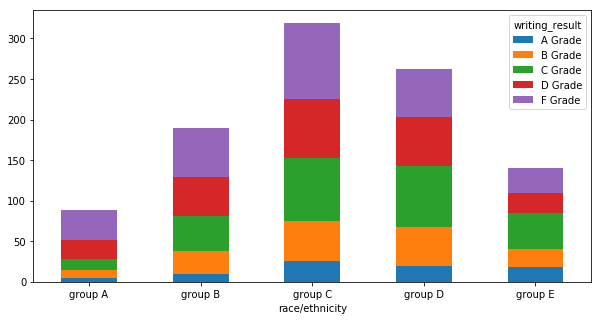

In [53]:
pd.crosstab(data['race/ethnicity'],data['writing_result']).plot.bar(stacked=True,figsize=(10,5))
plt.xticks(rotation=360)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

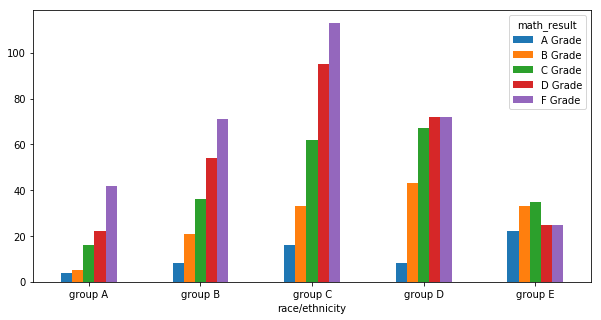

In [54]:
pd.crosstab(data['race/ethnicity'],data['math_result']).plot.bar(figsize=(10,5))
plt.xticks(rotation=360)

### Considering the group vs math_result
The group C has large number of students with the F grade
The group E has more Grade A students

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

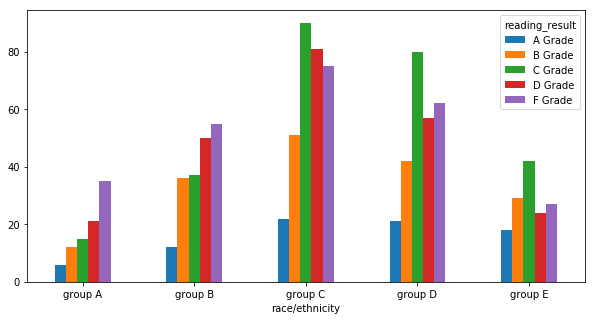

In [55]:
pd.crosstab(data['race/ethnicity'],data['reading_result']).plot.bar(figsize=(10,5))
plt.xticks(rotation=360)

In [56]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_result,reading_result,writing_result
0,female,group B,bachelor's degree,standard,none,72,72,74,C Grade,C Grade,C Grade
1,female,group C,some college,standard,completed,69,90,88,D Grade,A Grade,B Grade
2,female,group B,master's degree,standard,none,90,95,93,A Grade,A Grade,A Grade
3,male,group A,associate's degree,free/reduced,none,47,57,44,F Grade,F Grade,F Grade
4,male,group C,some college,standard,none,76,78,75,C Grade,C Grade,C Grade


(array([0, 1]), <a list of 2 Text xticklabel objects>)

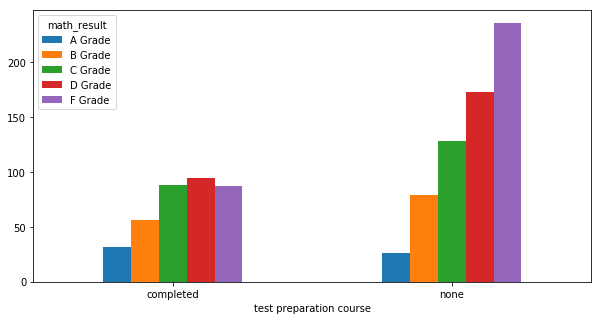

In [57]:
pd.crosstab(data['test preparation course'],data['math_result']).plot.bar(figsize=(10,5))
plt.xticks(rotation=360)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

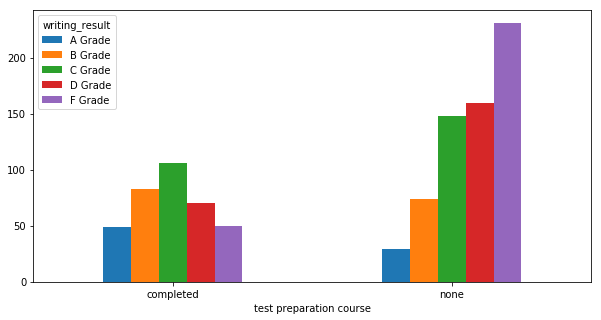

In [58]:
pd.crosstab(data['test preparation course'],data['writing_result']).plot.bar(figsize=(10,5))
plt.xticks(rotation=360)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

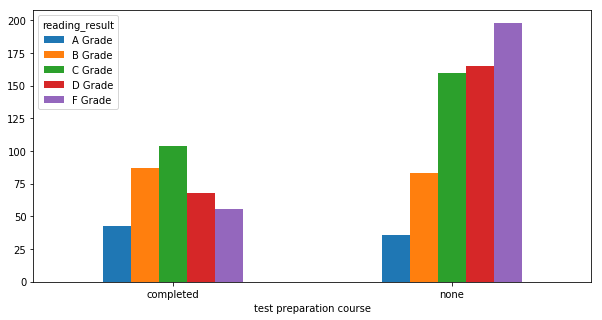

In [59]:
pd.crosstab(data['test preparation course'],data['reading_result']).plot.bar(figsize=(10,5))
plt.xticks(rotation=360)

In [60]:
#according to the US grading system because the this is the US data
def grade_cat(marks):
    if marks<60:
        return 0.0
    elif 60<=marks<=69:
        return 1.0
    elif 70<=marks<=79:
        return 2.0
    elif 80<=marks<=89:
        return 3.0
    else:
        return 4.0
    
data['math_grade_point']  = data['math score'].apply(grade_cat)  
data['reading_grade_point']  = data['reading score'].apply(grade_cat) 
data['writing_grade_point']  = data['writing score'].apply(grade_cat) 

In [61]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_result,reading_result,writing_result,math_grade_point,reading_grade_point,writing_grade_point
0,female,group B,bachelor's degree,standard,none,72,72,74,C Grade,C Grade,C Grade,2.0,2.0,2.0
1,female,group C,some college,standard,completed,69,90,88,D Grade,A Grade,B Grade,1.0,4.0,3.0
2,female,group B,master's degree,standard,none,90,95,93,A Grade,A Grade,A Grade,4.0,4.0,4.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,F Grade,F Grade,F Grade,0.0,0.0,0.0
4,male,group C,some college,standard,none,76,78,75,C Grade,C Grade,C Grade,2.0,2.0,2.0


In [62]:
data['math_grade_point'].value_counts()

0.0    323
1.0    268
2.0    216
3.0    135
4.0     58
Name: math_grade_point, dtype: int64

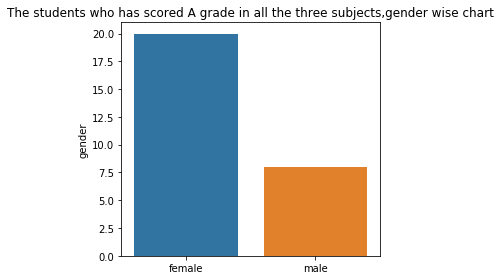

In [75]:
data_A_grade=data[(data['math_result']=='A Grade') & (data['reading_result']=='A Grade') & (data['writing_result']=='A Grade')]
sns.barplot(x=data_A_grade['gender'].value_counts().index,y=data_A_grade['gender'].value_counts())
plt.title('The students who has scored A grade in all the three subjects,gender wise chart')
plt.tight_layout()

#### As we can see from the above chart that the females number is high who has scored A grade in all the three test.

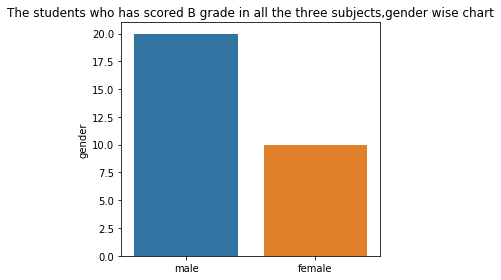

In [79]:
data_B_grade=data[(data['math_result']=='B Grade') & (data['reading_result']=='B Grade') & (data['writing_result']=='B Grade')]
sns.barplot(x=data_B_grade['gender'].value_counts().index,y=data_B_grade['gender'].value_counts())
plt.title('The students who has scored B grade in all the three subjects,gender wise chart')
plt.tight_layout()

#### As we can see from the above chart that more numbers of males are scoring B grading in all three subjects when compared to the females 

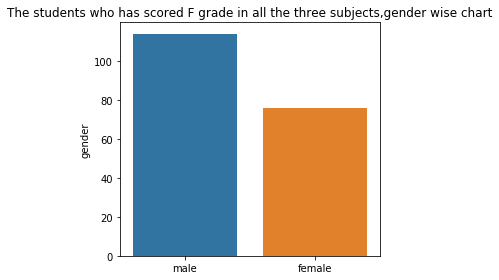

In [84]:
data_F_grade=data[(data['math_result']=='F Grade') & (data['reading_result']=='F Grade') & (data['writing_result']=='F Grade')]
sns.barplot(x=data_F_grade['gender'].value_counts().index,y=data_F_grade['gender'].value_counts())
plt.title('The students who has scored F grade in all the three subjects,gender wise chart')
plt.tight_layout()

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

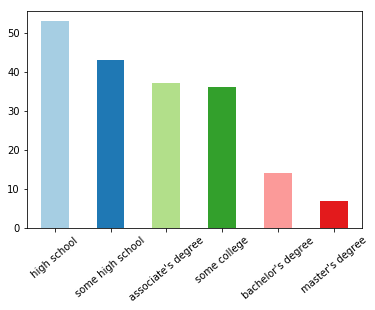

In [100]:
ct=data_F_grade['parental level of education'].value_counts()
ct.plot.bar(color=plt.cm.Paired(np.arange(len(ct))))
plt.xticks(rotation=40)

#### Considering the F grade in all the three test

#### From the above chart we can say that the students who has secured F grade are from the High schools.
#### The students who are holding the Bachelors and masters degree are less in F grade category.

In [101]:
data_A_grade['parental level of education'].value_counts()

bachelor's degree     11
associate's degree     7
some college           4
master's degree        3
some high school       2
high school            1
Name: parental level of education, dtype: int64

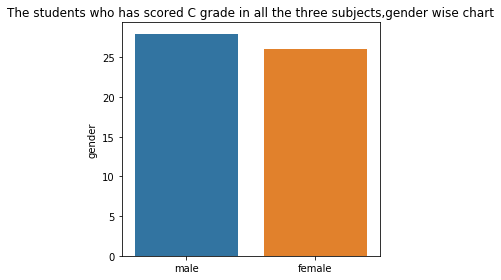

In [102]:
data_C_grade=data[(data['math_result']=='C Grade') & (data['reading_result']=='C Grade') & (data['writing_result']=='C Grade')]
sns.barplot(x=data_C_grade['gender'].value_counts().index,y=data_C_grade['gender'].value_counts())
plt.title('The students who has scored C grade in all the three subjects,gender wise chart')
plt.tight_layout()

The proportion of male and female is quite same for the C grade

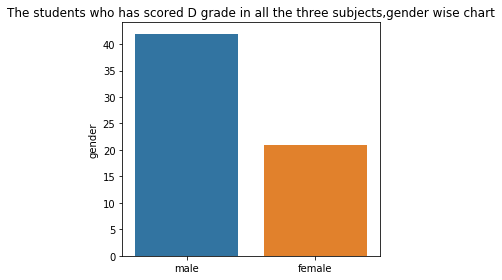

In [104]:
data_D_grade=data[(data['math_result']=='D Grade') & (data['reading_result']=='D Grade') & (data['writing_result']=='D Grade')]
sns.barplot(x=data_D_grade['gender'].value_counts().index,y=data_D_grade['gender'].value_counts())
plt.title('The students who has scored D grade in all the three subjects,gender wise chart')
plt.tight_layout()

The proportion of male is high in the D grade category

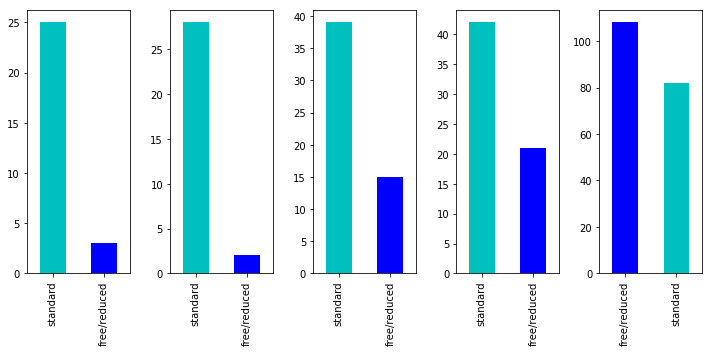

In [134]:
fig,ax =plt.subplots(1,5,figsize=(10,5))
data_A_grade['lunch'].value_counts().plot.bar(ax=ax[0],color=['c','b'])
data_B_grade['lunch'].value_counts().plot.bar(ax=ax[1],color=['c','b'])
data_C_grade['lunch'].value_counts().plot.bar(ax=ax[2],color=['c','b'])
data_D_grade['lunch'].value_counts().plot.bar(ax=ax[3],color=['c','b'])
data_F_grade['lunch'].value_counts().plot.bar(ax=ax[4],color=['b','c'])
plt.tight_layout()

Considering all the grades in the three test
The students who has secured the F grade in all the three test has taken the Freee/reduced lunch.
As the Grade is decreasing the free\reduced lunch value is increasing.

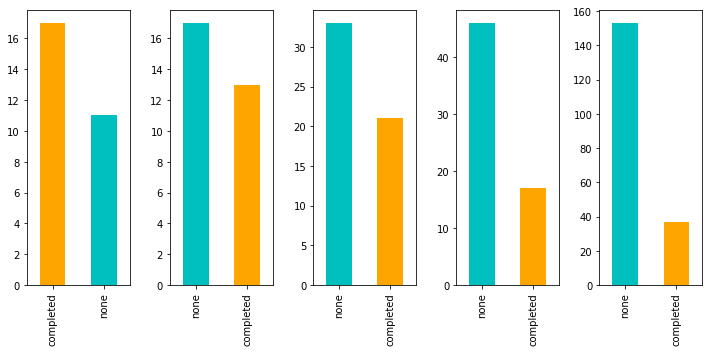

In [137]:
fig,ax =plt.subplots(1,5,figsize=(10,5))
data_A_grade['test preparation course'].value_counts().plot.bar(ax=ax[0],color=['orange','c'])
data_B_grade['test preparation course'].value_counts().plot.bar(ax=ax[1],color=['c','orange'])
data_C_grade['test preparation course'].value_counts().plot.bar(ax=ax[2],color=['c','orange'])
data_D_grade['test preparation course'].value_counts().plot.bar(ax=ax[3],color=['c','orange'])
data_F_grade['test preparation course'].value_counts().plot.bar(ax=ax[4],color=['c','orange'])
plt.tight_layout()

Considering the three test scores
1.As the grade is decreasing the number of students who has completed the test preparation course is decreasing.
2.The students who are not taking the test prepartion course are likely to fall under the B,C,D,F grades.

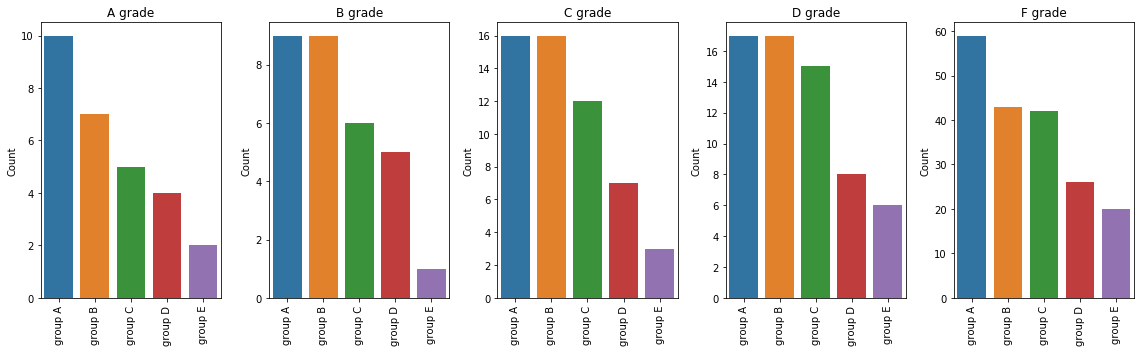

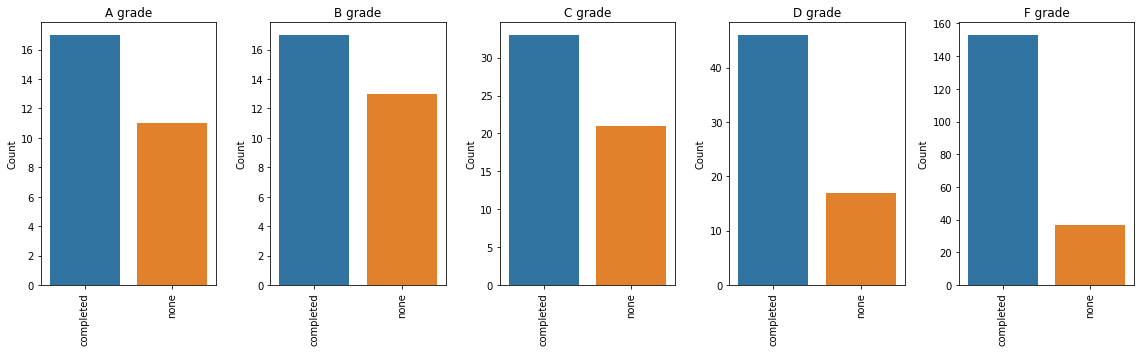

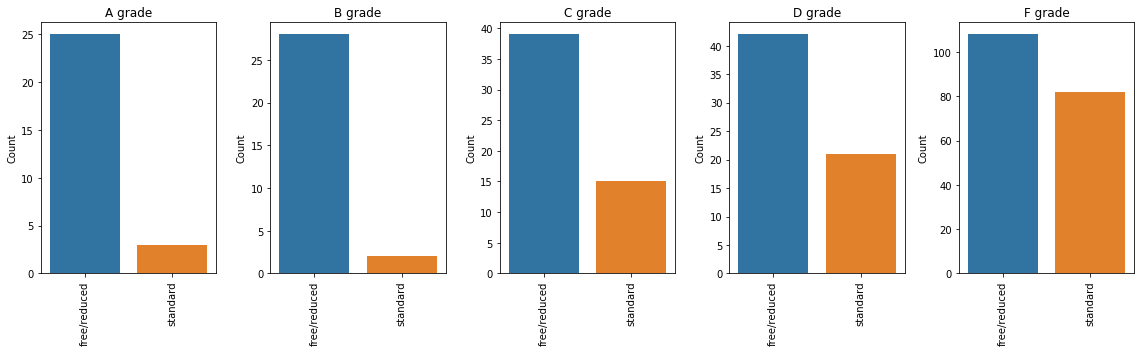

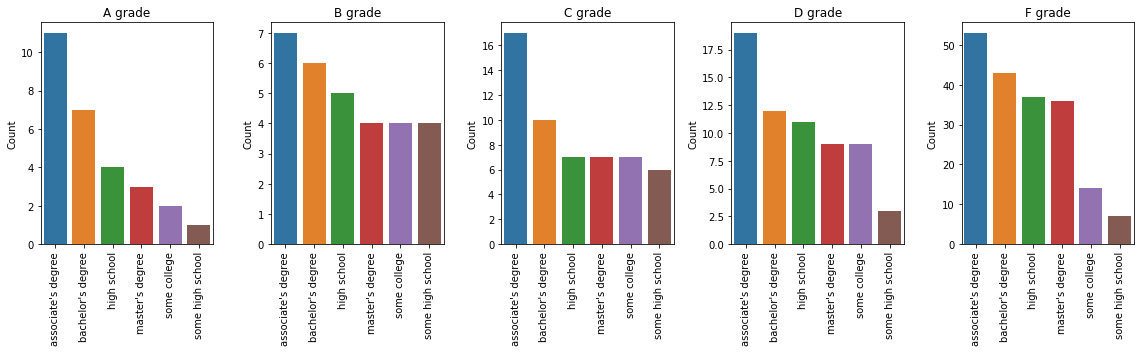

In [184]:

def col_com(col):
    fig,ax =plt.subplots(1,5,figsize=(16,5))
    a=sns.barplot(x=data_A_grade[col].value_counts().index.sort_values(),y=data_A_grade[col].value_counts(),ax=ax[0]) 
    b=sns.barplot(x=data_B_grade[col].value_counts().index.sort_values(),y=data_B_grade[col].value_counts(),ax=ax[1])
    c=sns.barplot(x=data_C_grade[col].value_counts().index.sort_values(),y=data_C_grade[col].value_counts(),ax=ax[2])
    d=sns.barplot(x=data_D_grade[col].value_counts().index.sort_values(),y=data_D_grade[col].value_counts(),ax=ax[3]) 
    e=sns.barplot(x=data_F_grade[col].value_counts().index.sort_values(),y=data_F_grade[col].value_counts(),ax=ax[4]) 
   
    
    ax[0].set_title('A grade'),ax[0].set_ylabel('Count'),a.set_xticklabels(a.get_xticklabels(),rotation=90)
    ax[1].set_title('B grade'),ax[1].set_ylabel('Count'),b.set_xticklabels(b.get_xticklabels(),rotation=90)
    ax[2].set_title('C grade'),ax[2].set_ylabel('Count'),c.set_xticklabels(c.get_xticklabels(),rotation=90)
    ax[3].set_title('D grade'),ax[3].set_ylabel('Count'),d.set_xticklabels(d.get_xticklabels(),rotation=90)
    ax[4].set_title('F grade'),ax[4].set_ylabel('Count'),e.set_xticklabels(e.get_xticklabels(),rotation=90)
    plt.tight_layout()
    
    
col_com('race/ethnicity')
col_com('test preparation course') 
col_com('lunch') 
col_com('parental level of education') 

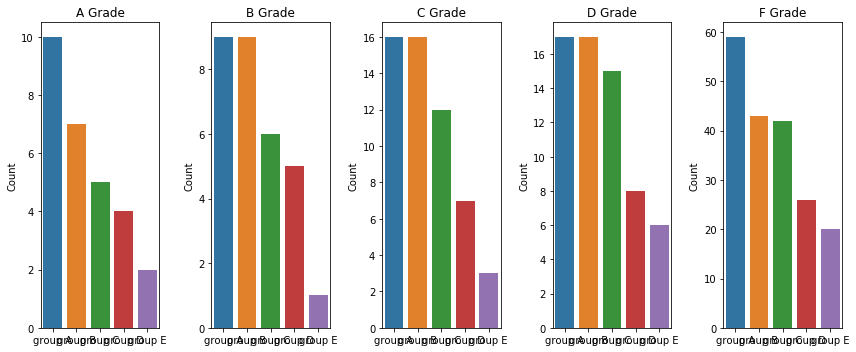

In [199]:
def grade_data(col1,col2,col3,col4):
    
    fig,ax = plt.subplots(1,5,figsize=(12,5))

    data_A_grade=data[(data[col1]=='A Grade') & (data[col2]=='A Grade') & (data[col3]=='A Grade')]
    data_B_grade=data[(data[col1]=='B Grade') & (data[col2]=='B Grade') & (data[col3]=='B Grade')]
    data_C_grade=data[(data[col1]=='C Grade') & (data[col2]=='C Grade') & (data[col3]=='C Grade')]
    data_D_grade=data[(data[col1]=='D Grade') & (data[col2]=='D Grade') & (data[col3]=='D Grade')]
    data_F_grade=data[(data[col1]=='F Grade') & (data[col2]=='F Grade') & (data[col3]=='F Grade')]
    
    sns.barplot(x=data_A_grade[col4].value_counts().index.sort_values(),y=data_A_grade[col4].value_counts(),ax=ax[0])
    sns.barplot(x=data_B_grade[col4].value_counts().index.sort_values(),y=data_B_grade[col4].value_counts(),ax=ax[1])
    sns.barplot(x=data_C_grade[col4].value_counts().index.sort_values(),y=data_C_grade[col4].value_counts(),ax=ax[2])
    sns.barplot(x=data_D_grade[col4].value_counts().index.sort_values(),y=data_D_grade[col4].value_counts(),ax=ax[3])
    sns.barplot(x=data_F_grade[col4].value_counts().index.sort_values(),y=data_F_grade[col4].value_counts(),ax=ax[4])
    
    ax[0].set_title('A Grade'),ax[0].set_ylabel('Count')
    ax[1].set_title('B Grade'),ax[1].set_ylabel('Count')
    ax[2].set_title('C Grade'),ax[2].set_ylabel('Count')
    ax[3].set_title('D Grade'),ax[3].set_ylabel('Count')
    ax[4].set_title('F Grade'),ax[4].set_ylabel('Count')
    #plt.title('Considering all the grades vs the gender ')
    plt.tight_layout()

grade_data('math_result','reading_result','writing_result','race/ethnicity')    